### Credit Card fraud detection

We have used logistic regression model to detect the credit card fraud. Dateset source is:https://www.kaggle.com/code/tarunkumar1912/credit-card-fraud-deduction-logistic-regression/data

Steps involved:
1. Data preprocessing
2. Data scaling
3. train and test split
4. traing logistic model
5. Calculating precision, recall and f1 score 
6. ploting precision_recall curve 

In [104]:
import pandas as pd

df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [140]:
df.shape

(284807, 31)

In [142]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [145]:
df.duplicated().sum()

1081

In [146]:
df.drop_duplicates(inplace=True)

In [147]:
x=df.loc[:,'Time':'Amount']

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [149]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test= train_test_split(X, df['Class'], test_size=0.3)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [150]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [151]:
import numpy as np

In [152]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [153]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

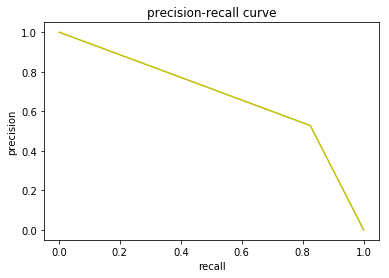

In [154]:
fig,ax=plt.subplots()
ax.plot(precision, recall, color='y')
ax.set_title("precision-recall curve")
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.show()

In [155]:
# function to calculate precision, recall and f1

def cal_prec_recall_f1(y_test,y_pred):
    
    y_pred=pd.Series(y_pred, index=y_test.index)
    tp=0
    fn=0
    fp=0
    for i in y_test.index:
        if y_test[i]==1 and y_pred[i]==1:
            tp=tp+1
        if y_test[i]==1 and y_pred[i]==0:
            fn=fn+1
        if y_test[i]==0 and y_pred[i]==1:
            fp=fp+1
            
    if tp>0:
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        f1=2*(precision*recall)/(precision+recall)
        
    return precision, recall, f1
    
    
p,r,f1=cal_prec_recall_f1(y_test,y_pred)


In [156]:
print(f'precision:{p}')
print(f'recall:{r}')
print(f'f1 score:{f1}')

precision:0.825
recall:0.528
f1 score:0.6439024390243903
